In [1]:
pip install xgboost

## MACHINE LEARNING PROJECT: CHURN ANALYSIS 
Michele Cibelli, Filippo Piccaro, Giulia Pinto, Marta Rubino

## INTRODUCTION
The StayWithMe (SWM) Bank in concerned about the decrease in its customers since some of them are leaving their credit card service.Our main required task is to predict who is going to leave, an important information that could give the chance to offer better service and conditions to customers that are thinking to leave the bank. We have a dataset (“churn.csv”) consisting of 10127 observations of 17 variables, avalaible on https://www.dropbox.com/s/7nwimmta836si5f/churn.csv?dl=0 In order to proceed with our analysis, we generated a training set and a test set from the original data. Right after, we created and implemented different models to perform predictions, compare the models between themselves, and to evaluate our data. Our ultimate step was to discuss the obtained results from the analysis and the future implementation of the model that we choose 

## METHODS

In order to implement and improve our model, our started point can be individualized in an meticulous observation of the given dataset. Thus, we proceeded with scanning  the information available and studying our variables.
As already mentioned in the introduction, the given dataset consists of 10127 observations of 17 variables. In particular the latter includes:
●  Basic info:
○  CLIENTNUM : Unique identifier for the customer holding the account.
●  Target:
○  Attrition_Flag: Specifies whether the account was closed (Attrited Customer).
●  Demographic Variables:
○  Customer_Age: Demographic variable - Customer's Age in Years.
○  Gender: Demographic variable - M=Male, F=Female.
○  Dependent_count: Demographic variable - Number of dependents.
○  Education_Level: Demographic variable - Educational Qualification of the account holder (example: high school, college     graduate, etc.).
○  Marital_Status: Demographic variable - Married, Single, Divorced, Unknown.
○  Income_Category: Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K−80K, … ). ● Variables (Product):
○  Card_Category: Product Variable - Type of Card (Blue, Silver, Gold, Platinum).
○  Months_on_book: Period of relationship with bank.
○  Total_Relationship_Count: Total no. of products held by the customer.
○  Months_Inactive_12_mon: No. of Months in the last 12 months.
○  Contacts_Count_12_mon: No. of Contacts in the last 12 months.
○  Credit_Limit: Credit Limit on the Credit Card.
○  Total_Trans_Amt: Total Transaction Amount (Last 12 months).
○  Total_Trans_Ct: Total Transaction Count (Last 12 months).
○  Avg_Utilization_Ratio: Average Card Utilization Ratio.
The next step was to clean our dataset, with a particular focus on the unknown values and on their potential replacement or, considering a most extreme scenario, removal. 
Thanks to a data visualization approach, we then proceeded on with an analysis of our variables, and also of the way they behaved, focusing on interactions between them. This approach included as well not only the development of two types of graphs (bar graphs and pie charts), but also the analysis of the correlation matrix. This latter step was crucial for the identification of potential elevated correlations between variables. 
The just described processes, led us to the delicate phase concerning the selection of the best model to implement, in order to obtain the most accurate prevision. As for the output, we choose the attrition flag column (with 1 for existing customer and 0 for attrited customer). Furthermore the features were scaled and an encoding was applied to categorical variables. Plus, we applied a split between train and test with the 75% for the train and the 25% for the test. Then, we implemented four different models, such as Logistic Regression, Random Forest, K Nearest Neighbor, and Support Vector Machine. 
The results obtained were then analyzed, with a following examination of the score of the accuracy, precision, recall, f1, fbeta, and test roc curve. 
As a consequence of the last steps, the best model was individualized in the Random Forest one; after obtaining this information, we proceeded with the model evaluation analysis, through the above-mentioned model. The latter analysis took place thanks to a cross validation and the implementation of a confusion matrix.


## CODE DESCRIPTION

## Libraries

here follow the libraries used in order to solve the task requested:
1. Numpy: it is an important package that returns a multidimensional array object, various derived objects (e.g., matrices), and an assortment of routines for fast operations on arrays. [ https://numpy.org/doc/stable/user/whatisnumpy.html ]
2. Matplotlib: is a comprehensive library for creating static, animated, and interactive visualizations in Python  [ https://matplotlib.org ]
3. Scikit Learn: is a library that provides a selection of efficient tools for machine learning and statistical modeling, including classification, regression, clustering, and dimensionality reduction [ https://www.tutorialspoint.com/scikit_learn/scikit_learn_introduction.htm ]
4. Pandas: a library that provides high-performance, easy-to-use data structures, and data analysis tools [ https://pandas.pydata.org/docs/ ]
5. Seaborn: is a data visualization library based on matplotlib that provides high-level interface for drawing attractive and informative statistical graphs [ https://seaborn.pydata.org ]
6. Plotly: is an interactive, open-source plotting library that supports over 40 unique chart types. [ https://plotly.com/python/getting-started/ ]. 

In [80]:
#Libraries that we need 
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn
import seaborn as sn
from matplotlib import pyplot
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import matplotlib 
%matplotlib inline
color = sn.color_palette()
import matplotlib.ticker as mtick

## Data Collection

For this step, we imported the dataset and analyzed the information related to it. Among these, we were able to identify the presence of integers, float, categorical variables (objects), and the absence of null variables. However some unknown values came to light. 

In [81]:
#importing the dataset
data = pd.read_csv('churn.csv', index_col=0)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
4,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,15476,117,7.42
10124,710638233,Attrited Customer,41,M,2,Unknown,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,8764,69,8.31
10125,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,10291,60,0.00
10126,717406983,Attrited Customer,30,M,2,Graduate,Unknown,$40K - $60K,Blue,36,4,3,3,5281.0,8395,62,0.00


In [82]:
#giving general info about the variables type
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10127 entries, 1 to 10127
Data columns (total 17 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [83]:
#take the list with the columns names as a reference
listcolname=list(data.columns)
print(listcolname)
print(len(listcolname))

['CLIENTNUM', 'Attrition_Flag', 'Customer_Age', 'Gender', 'Dependent_count', 'Education_Level', 'Marital_Status', 'Income_Category', 'Card_Category', 'Months_on_book', 'Total_Relationship_Count', 'Months_Inactive_12_mon', 'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Trans_Amt', 'Total_Trans_Ct', 'Avg_Utilization_Ratio']
17


## Data Cleaning

the starting point of the data cleaning process was the conversion of unknown values into “Nan” type ones.

In [84]:
data=data.replace('Unknown', np.NaN)
data

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
4,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,15476,117,7.42
10124,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,8764,69,8.31
10125,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,10291,60,0.00
10126,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,8395,62,0.00


In [85]:
#we define some useful function
#1) we define a function that gives back all the "Nan" info
def NaN_row_counter(df):
    a=len(df.index)
    count=0
    count1=0
    count2=0
    count3=0
    count4=0
    for j in range(a-1 , -1, -1):
        for i in df.iloc[j].isna():
            if i==True:
                count +=1
        if count==1:
            count1+=1
        elif count==2:
            count2+=1  
        elif count>2:
            count3+=1
        count=0 
    print("The row with 1 'NaN' values are: ", count1) 
    print("The row with 2 'NaN' values are: ", count2) 
    print("The row with 3 'NaN' values are: ", count3)
    for j in range(a-1 , -1, -1):
        for i in df.iloc[j].isna():
            if i==True:
                count4+=1
                break
    print("total rows with at least 1 'NaN' value are: ", count4)
    print("percentage of the dataset: ", count4/len(df.index)*100, '%')
    
#2)this function counts every number for each value  
def value_counter(df, listcolname):
    numval={}
    for i in range(0, len(listcolname)): #prendo solo i valori da Attrition
        key=listcolname[i]
        a=df[listcolname[i]].value_counts()
        numval[key] = a
    return numval    

#3)gives back the number of "Nan" for each column   
def NaN_counter(df, listcolname): 
    dfnumunk=pd.DataFrame(columns=listcolname, index=['number of NaN'])
    count=0
    for i in listcolname:
        for j in df[i]:

            if j=='NaN':
                count+=1
            else:
                None
        dfnumunk.loc['number of NaN', i] = df[i].isna().sum()
    return dfnumunk  

We then defined the functions that could give us relevant and precise quantitative information. Once we concluded this step, we deleted rows concerning customers that presented more than three Nan values; to do so, we defined another function.

In [86]:
#general distribution of the data 
value_counter(data, listcolname)

{'CLIENTNUM': 709920258    1
 717171408    1
 709372608    1
 796336833    1
 721433283    1
             ..
 720250158    1
 709831983    1
 720917808    1
 719207733    1
 708085458    1
 Name: CLIENTNUM, Length: 10127, dtype: int64,
 'Attrition_Flag': Existing Customer    8500
 Attrited Customer    1627
 Name: Attrition_Flag, dtype: int64,
 'Customer_Age': 44    500
 49    495
 46    490
 45    486
 47    479
 43    473
 48    472
 50    452
 42    426
 51    398
 53    387
 41    379
 52    376
 40    361
 39    333
 54    307
 38    303
 55    279
 56    262
 37    260
 57    223
 36    221
 35    184
 58    157
 59    157
 34    146
 33    127
 60    127
 32    106
 65    101
 61     93
 62     93
 31     91
 26     78
 30     70
 63     65
 29     56
 64     43
 27     32
 28     29
 67      4
 68      2
 66      2
 70      1
 73      1
 Name: Customer_Age, dtype: int64,
 'Gender': F    5358
 M    4769
 Name: Gender, dtype: int64,
 'Dependent_count': 3    2732
 2    2655
 1    1

In [87]:
#number of rows with missing data
NaN_row_counter(data)

The row with 1 'NaN' values are:  2719
The row with 2 'NaN' values are:  320
The row with 3 'NaN' values are:  7
total rows with at least 1 'NaN' value are:  3046
percentage of the dataset:  30.07800928211711 %


In [88]:
#let's see how many missing values are and where are they
NaN_counter(data, listcolname)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
number of NaN,0,0,0,0,0,1519,749,1112,0,0,0,0,0,0,0,0,0


the number of thoose values are not too high, but still quite consistent. Actually we can still eliminate values with more than 3 NaN

In [89]:
#create a function that eliminate only the rows with atleasts 1 or 2 or 3 NaN based on the parameters
def NaN_remover(df, listcolname, removedrows=False, numberNaN=1):
      
    dfremovedrows=pd.DataFrame(columns=listcolname)
    dfx=df.copy()
    a=len(dfx.index)
    ind=list(dfx.index)
    count1=0
    if numberNaN==1:
        for j in range(a-1 , -1, -1):
            for i in dfx.iloc[j].isna():
                if i==True :
                    b=dfx.iloc[j]
                    dfremovedrows=dfremovedrows.append([b])
                    dfx.drop(ind[j], inplace=True)
                    break
        dfremovedrows.sort_index(inplace=True)
        if  removedrows==True:
            print('removed row dataframe created.')
            return dfremovedrows
        else:
            print('dataframe created.')
            return dfx
    
    if numberNaN==2:
        for j in range(a-1 , -1, -1):
            count1=0
            for i in dfx.iloc[j].isna():
                if i==True:
                    count1 +=1
                    #print(count1)
                elif count1>1:
                    b=dfx.iloc[j]
                    dfremovedrows=dfremovedrows.append([b])
                    dfx.drop(ind[j], inplace=True)
                    break
        
        dfremovedrows.sort_index(inplace=True)
        if  removedrows==True:
            print('removed row dataframe created.')
            return dfremovedrows
        else:
            print('dataframe created.')
            return dfx
    
    if numberNaN==3:
        for j in range(a-1 , -1, -1):
            count1=0
            for i in dfx.iloc[j].isna():
           
                if i==True:
                    count1 +=1
                elif count1==3:
                    b=dfx.iloc[j]
                    dfremovedrows=dfremovedrows.append([b])
                    dfx.drop(ind[j], inplace=True)
                    break
        
        dfremovedrows.sort_index(inplace=True)
        if  removedrows==True:
            print('removed row dataframe created.')
            return dfremovedrows
        else:
            print('dataframe created.')
            return dfx

In [90]:
dataraw=NaN_remover(data, listcolname, removedrows=False, numberNaN=3)
dataraw

dataframe created.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,4,1,0,3418.0,1887,20,0.00
4,769911858,Existing Customer,40,F,4,High School,NaN,Less than $40K,Blue,34,3,4,1,3313.0,1171,20,1.16
5,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,5,1,0,4716.0,816,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,772366833,Existing Customer,50,M,2,Graduate,Single,$40K - $60K,Blue,40,3,2,3,4003.0,15476,117,7.42
10124,710638233,Attrited Customer,41,M,2,NaN,Divorced,$40K - $60K,Blue,25,4,2,3,4277.0,8764,69,8.31
10125,716506083,Attrited Customer,44,F,1,High School,Married,Less than $40K,Blue,36,5,3,4,5409.0,10291,60,0.00
10126,717406983,Attrited Customer,30,M,2,Graduate,NaN,$40K - $60K,Blue,36,4,3,3,5281.0,8395,62,0.00


For our next step, we draw our attention to the “Income Category” column. The latter, presented a range of values, concerning the income, that were not perfectly suitable for our model; thus we started right from those ranges to create four income values to assign to each client, based on its belonging range. We grouped the values for their education level and calculated the mean of every one of them (thanks to a for cycle); as a result we noticed that the mean registered values near the income range between 40 thousand, and 80 thousand (later converted to 60 thousand). Right after we replaced each of the missing values within the income range between 40 and 80 thousand, thus 60 thousand. Then, we counted “Nan” values one more time


In [91]:
#income category: in this variable we have 4 different ranges of price with different widths.
#we need to create new price ranges and associate a value to them. In order to do so we need to:
#* first create the new price range(0-40k, 40k-80k, 80k-120k, 120k+ )
#* convert them to values(i decide to take the average price between the extreme of the range)
oldranges=['Less than $40K','$40K - $60K', '$60K - $80K', '$80𝐾− $120K','$120K +', 'UnKnown']
newranges=[20000.0, 60000.0, 100000.0, 140000.0]
dataraw1=dataraw.copy()
dataraw1['Income_Category'] = dataraw1['Income_Category'].replace(['$40K - $60K', '$60K - $80K'],'40k-80k')
dataraw1['Income_Category'] = dataraw1['Income_Category'].replace(['Less than $40K'],'0k-40k')
dataraw1['Income_Category'] = dataraw1['Income_Category'].replace(['$80K - $120K'],'80k-120k')
dataraw1['Income_Category'] = dataraw1['Income_Category'].replace(['$120K +'],'120k+')
dataraw1['Income_Category'] = dataraw1['Income_Category'].replace(['0k-40k','40k-80k','80k-120k','120k+'], newranges)
value_counter(dataraw1, ['Income_Category'])
dataraw1

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,60000.0,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,20000.0,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,100000.0,Blue,36,4,1,0,3418.0,1887,20,0.00
4,769911858,Existing Customer,40,F,4,High School,NaN,20000.0,Blue,34,3,4,1,3313.0,1171,20,1.16
5,709106358,Existing Customer,40,M,3,Uneducated,Married,60000.0,Blue,21,5,1,0,4716.0,816,28,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10123,772366833,Existing Customer,50,M,2,Graduate,Single,60000.0,Blue,40,3,2,3,4003.0,15476,117,7.42
10124,710638233,Attrited Customer,41,M,2,NaN,Divorced,60000.0,Blue,25,4,2,3,4277.0,8764,69,8.31
10125,716506083,Attrited Customer,44,F,1,High School,Married,20000.0,Blue,36,5,3,4,5409.0,10291,60,0.00
10126,717406983,Attrited Customer,30,M,2,Graduate,NaN,60000.0,Blue,36,4,3,3,5281.0,8395,62,0.00


In [92]:
#let's take only the columns that are usefull and calculate the median for each education level
dataedinc=dataraw1.loc[:,['Education_Level','Income_Category']]
listlvlinc=['Uneducated', 'High School', 'College', 'Graduate', 'Post-Graduate', 'Doctorate']
for i in listlvlinc:
    a=dataedinc.loc[dataedinc['Education_Level'].isin([i])]
    print(a)
    mean=a['Income_Category'].mean()
    median=a['Income_Category'].median()
    print('')
    print('The mean of income for '+i+' is: ', mean )
    print('The median of income for '+i+' is: ', median )
    print('')

      Education_Level  Income_Category
5          Uneducated          60000.0
9          Uneducated          60000.0
11         Uneducated         140000.0
29         Uneducated              NaN
32         Uneducated          60000.0
...               ...              ...
10084      Uneducated              NaN
10086      Uneducated         140000.0
10103      Uneducated          20000.0
10116      Uneducated          60000.0
10120      Uneducated              NaN

[1487 rows x 2 columns]

The mean of income for Uneducated is:  57941.628264208906
The median of income for Uneducated is:  60000.0

      Education_Level  Income_Category
1         High School          60000.0
4         High School          20000.0
8         High School          60000.0
19        High School          60000.0
23        High School          60000.0
...               ...              ...
10106     High School          20000.0
10110     High School          20000.0
10114     High School          60000.0
10121   

In [95]:
#from our analysis we see that the madian value and mean value for all the classes are in the income range of 60000.
#we can put this value for all the NaN of Income Category
dataraw1['Income_Category'] = dataraw1['Income_Category'].fillna(60000.0)
#and check if code worked
l=['Education_Level','Marital_Status', 'Income_Category']
NaN_counter(dataraw1, l)

,Education_Level,Marital_Status,Income_Category
number of NaN,1512,742,0


In [96]:
NaN_row_counter(dataraw1)

The row with 1 'NaN' values are:  2040
The row with 2 'NaN' values are:  107
The row with 3 'NaN' values are:  0
total rows with at least 1 'NaN' value are:  2147
percentage of the dataset:  21.215415019762844 %


As can be deducted from above, we managed to scale down the number Nan values, and thus we chose to delete all the rows containing Nan values greater or equal to one, thanks to the functions previously described. The sample of observation on which we decided to use as the base of our analysis, is of 7973 clients.

In [97]:
#we can eliminate all the rows with more than 1 with the function defined before
dataset=NaN_remover(dataraw1, listcolname, removedrows=False)
dataset

dataframe created.


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,60000.0,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,20000.0,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,100000.0,Blue,36,4,1,0,3418.0,1887,20,0.00
5,709106358,Existing Customer,40,M,3,Uneducated,Married,60000.0,Blue,21,5,1,0,4716.0,816,28,0.00
6,713061558,Existing Customer,44,M,2,Graduate,Married,60000.0,Blue,36,3,1,2,4010.0,1088,24,5.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,710841183,Existing Customer,54,M,1,High School,Single,60000.0,Blue,34,5,2,0,13940.0,15577,114,2.31
10122,713899383,Existing Customer,56,F,1,Graduate,Single,20000.0,Blue,50,4,1,4,3688.0,14596,120,2.44
10123,772366833,Existing Customer,50,M,2,Graduate,Single,60000.0,Blue,40,3,2,3,4003.0,15476,117,7.42
10125,716506083,Attrited Customer,44,F,1,High School,Married,20000.0,Blue,36,5,3,4,5409.0,10291,60,0.00


This is our cleaned dataset, we still need to convert the categorical data in numeric one. We will do this after some graphical visualisation.

## Data Visualization 

In [98]:
dataset.head()

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,768805383,Existing Customer,45,M,3,High School,Married,60000.0,Blue,39,5,1,3,12691.0,1144,42,1.01
2,818770008,Existing Customer,49,F,5,Graduate,Single,20000.0,Blue,44,6,1,2,8256.0,1291,33,1.45
3,713982108,Existing Customer,51,M,3,Graduate,Married,100000.0,Blue,36,4,1,0,3418.0,1887,20,0.00
5,709106358,Existing Customer,40,M,3,Uneducated,Married,60000.0,Blue,21,5,1,0,4716.0,816,28,0.00
6,713061558,Existing Customer,44,M,2,Graduate,Married,60000.0,Blue,36,3,1,2,4010.0,1088,24,5.11


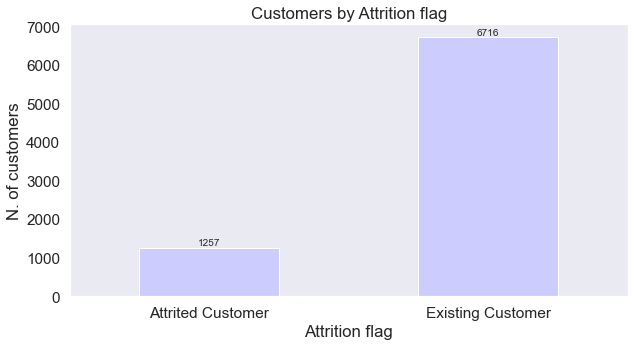

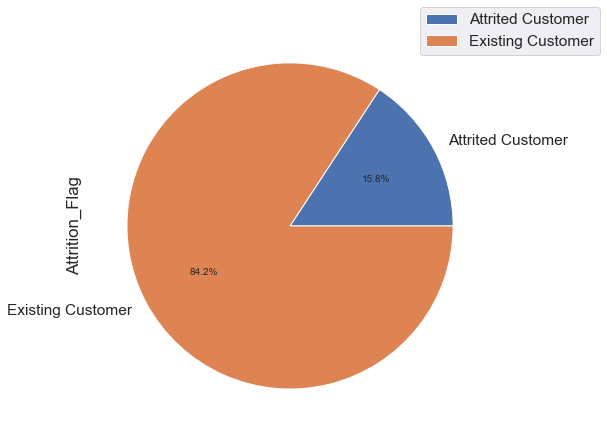

In [99]:
#extract the numbers of value using the predefined fuction and convert it into a datafram
attr = pd.DataFrame(value_counter(dataset, ['Attrition_Flag'])).sort_index()

#plot the dataframe
ax =  attr.plot.bar(title = 'Customers by Attrition flag', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='#CCCCFF',figsize =(10, 5), stacked=False)

plt.xticks(rotation=0)
ax.set_xlabel('Attrition flag')
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)
attr.plot.pie(y='Attrition_Flag', autopct="%.1f%%", figsize=(7.5, 7.5))
plt.legend(bbox_to_anchor=(0.8,0.9))

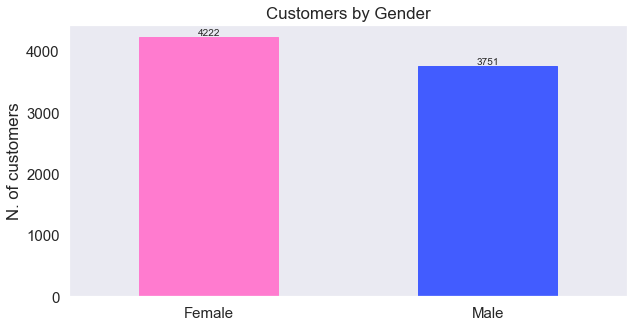

In [100]:
#extract the numbers of value using the predefined fuction and convert it into a datafram
gender=pd.DataFrame(value_counter(dataset, ['Gender']))

#plot the dataframe
ax =  gender.plot.bar(title = 'Customers by Gender', legend=False, table = False, grid = False, subplots = False,  figsize =(10, 5), fontsize = 15, stacked=False)
ax.set_xticklabels(["Female", "Male"])
ax.get_children()[0].set_color('#FF7BCF') 
ax.get_children()[1].set_color('#425CFF') 
plt.xticks(rotation=0)
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

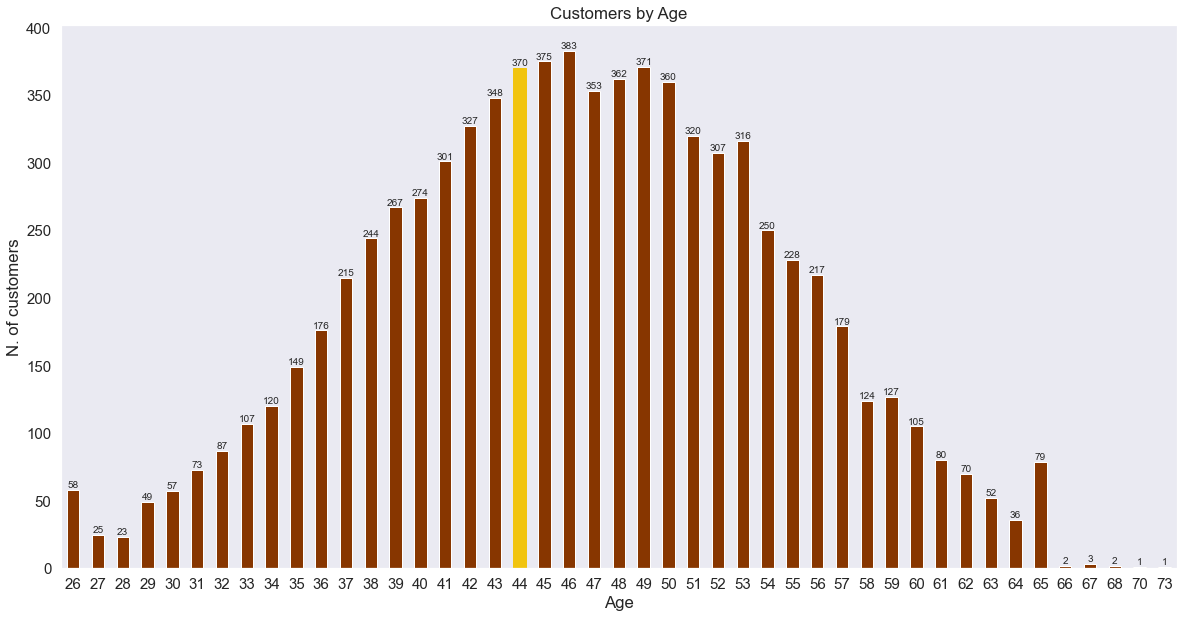

In [101]:
age=pd.DataFrame(value_counter(dataset, ['Customer_Age'])).sort_index()

ax =  age .plot.bar(title = 'Customers by Age', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='#873600',figsize =(20, 10), fontsize = 15, stacked=False)
ax.get_children()[18].set_color('#F1C40F') 
plt.xticks(rotation=0)
ax.set_xlabel('Age')
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

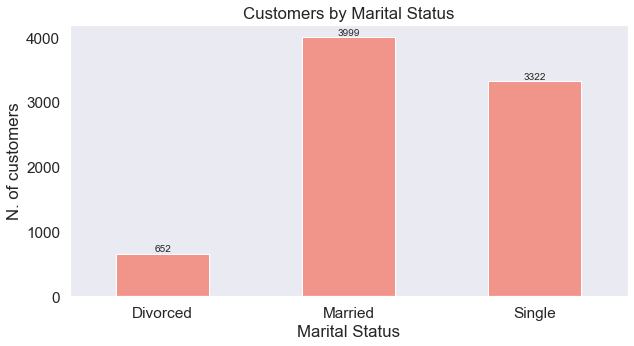

In [102]:
Marital_Status=pd.DataFrame(value_counter(dataset, ["Marital_Status"])).sort_index()

ax =  Marital_Status.plot.bar(title = 'Customers by Marital Status', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='#F1948A', figsize=(10,5), stacked=False)
                                         

plt.xticks(rotation=0)
ax.set_xlabel('Marital Status')
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

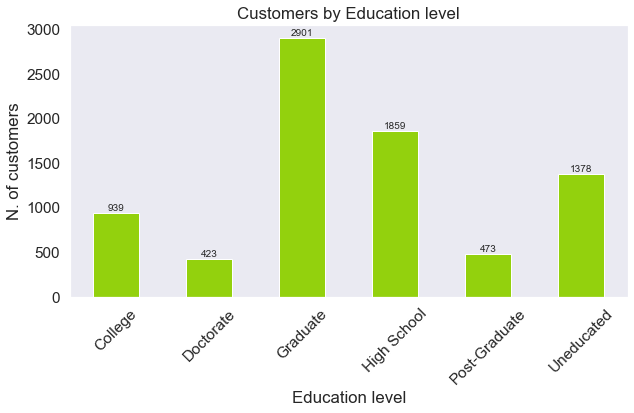

In [103]:
edu=pd.DataFrame(value_counter(dataset, ["Education_Level"])).sort_index()

ax =  edu.plot.bar(title = 'Customers by Education level', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='#93D10D', figsize=(10,5), stacked=False)
                                         

plt.xticks(rotation=45)
ax.set_xlabel('Education level')
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

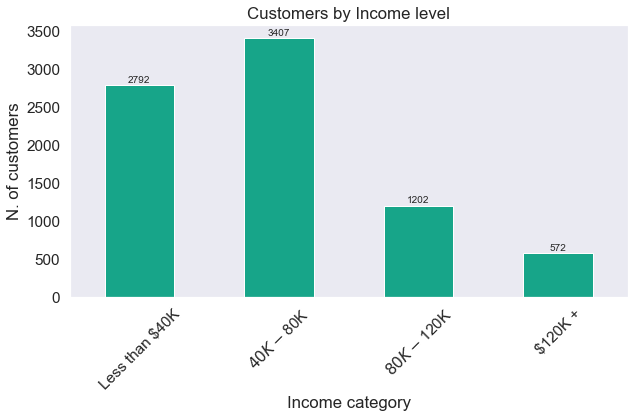

In [104]:
inc=pd.DataFrame(value_counter(dataset, ["Income_Category"])).sort_index()

ax =  inc.plot.bar(title = 'Customers by Income level', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='#17A589', figsize=(10,5), stacked=False)
                                         
labels=["Less than $40K", "$40K - $80K", "$80K - $120K","$120K +"]
ax.set_xticklabels(labels)
plt.xticks(rotation=45)
ax.set_xlabel('Income category')
ax.set_ylabel('N. of customers')

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

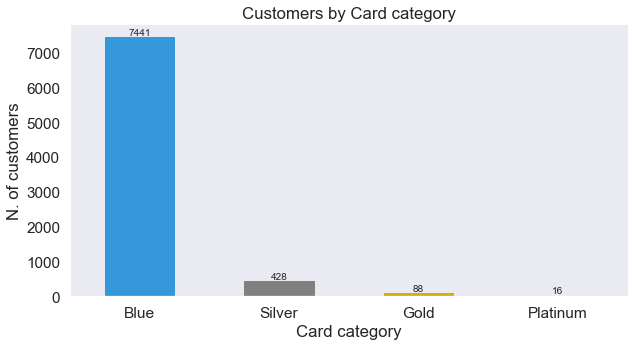

In [105]:
card  = pd.DataFrame(value_counter(dataset, ["Card_Category"]))
 
ax =  card.plot.bar(title = 'Customers by Card category', 
                                        legend=False, table = False, grid = False, subplots = False,  
                                         color='b', figsize=(10,5),stacked=False)                                         

plt.xticks(rotation=0)
ax.set_xlabel('Card category')
ax.set_ylabel('N. of customers')
ax.get_children()[0].set_color('#3498DB') 
ax.get_children()[1].set_color('grey') 
ax.get_children()[2].set_color('#D4AC0D') 
ax.get_children()[3].set_color('black') 

def add_value_labels(ax, spacing=0.4):   
    for rect in ax.patches:      
        y_value = rect.get_height()
        x_value = rect.get_x() + rect.get_width() / 2       
        space = spacing        
        va = 'bottom'      
        if y_value < 0:           
            space *= -1            
            va = 'top'       
        label = "{:.0f}".format(y_value)      
        ax.annotate(label, (x_value, y_value), xytext=(0, space), textcoords="offset points", ha='center',va=va)  
        
add_value_labels(ax)

Before proceeding with our analysis, we wanted to consider also the remaining categorical variables, applying to them a label encoding. The latter converts the data in machine-readable form, and it assigns a unique number (starting from zero) to each class of data.

In [106]:
#label encoding of all categorical variables
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
dataset['Attrition_Flag']= label_encoder.fit_transform(dataset['Attrition_Flag'])
dataset['Gender']= label_encoder.fit_transform(dataset['Gender'])
dataset['Education_Level']= label_encoder.fit_transform(dataset['Education_Level'])
dataset['Marital_Status']= label_encoder.fit_transform(dataset['Marital_Status'])
dataset['Card_Category']= label_encoder.fit_transform(dataset['Card_Category'])

<AxesSubplot:>

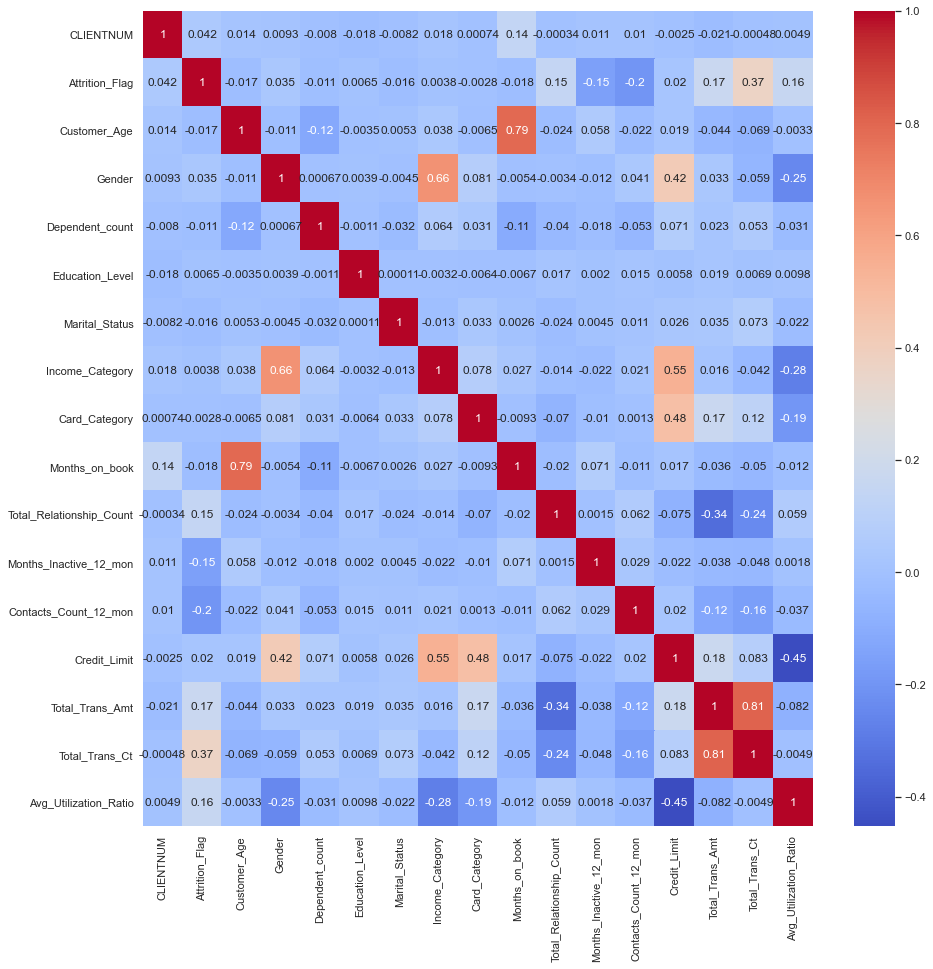

In [107]:
#we draw the correlation matrix
sn.set(style="white")
corr = dataset.corr()
plt.figure(figsize = (15,15))
sn.heatmap(corr, cmap='coolwarm', annot=True)

## MODEL SELECTION

In [108]:
#redefine the dataset, witholut the "CLIENTUM" column
dataset1=dataset.drop(['CLIENTNUM'], axis=1)
dataset1

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Trans_Amt,Total_Trans_Ct,Avg_Utilization_Ratio
1,1,45,1,3,3,1,60000.0,0,39,5,1,3,12691.0,1144,42,1.01
2,1,49,0,5,2,2,20000.0,0,44,6,1,2,8256.0,1291,33,1.45
3,1,51,1,3,2,1,100000.0,0,36,4,1,0,3418.0,1887,20,0.00
5,1,40,1,3,5,1,60000.0,0,21,5,1,0,4716.0,816,28,0.00
6,1,44,1,2,2,1,60000.0,0,36,3,1,2,4010.0,1088,24,5.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10121,1,54,1,1,3,2,60000.0,0,34,5,2,0,13940.0,15577,114,2.31
10122,1,56,0,1,2,2,20000.0,0,50,4,1,4,3688.0,14596,120,2.44
10123,1,50,1,2,2,2,60000.0,0,40,3,2,3,4003.0,15476,117,7.42
10125,0,44,0,1,3,1,20000.0,0,36,5,3,4,5409.0,10291,60,0.00


In [109]:
#we fix the variables
y = dataset1['Attrition_Flag']
x = dataset1.drop('Attrition_Flag', axis=1)

## Data Partitioning

we decided to operate a train test split, imported from sklearn, with a split of  75% for training set and 25% for test set.

In [110]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)

## Feature Scaling 

Once our features were numerical, we opted for Feature standardization , that makes the values of each feature in the data have zero-mean (when subtracting the mean in the numerator) and unit-variance.

In [111]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

## Model Selection

Logistic Regression: the main goal of the model is to settle the probability with which an observation can generate one or the other value of the dependent variable; furthermore, it can be used to classify the observations, based on the features of them, into two main categories, just like in our case. 

In [112]:
#Logistic regression
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(x_train,y_train)
y_predLOG = logreg.predict(x_test)

For each of these algorithms, we analyzed the obtained results through some scores, importable from sklearn. In particular,
Accuracy score: is the most intuitive performance measure and it is simply a ratio of correctly predicted observation to the total observations
Precision score: is defined as the relationship between true positive and the sum of true and false positive
Recall score: it measures the sensitivity of the model; it can be calculated through the relationship between the corrected prediction for a class, on the total of cases in which the prediction actually happens 
F score: F1 score is an harmonic mean, thus the reciprocal of the arithmetic mean of the reciprocals. In particular, this score is the harmonic mean of precision and recall. Contrary to a conventional mean, the harmonic one gives a higher weight to smaller values. 
F beta score: is the weighted harmonic mean of precision and recall, reaching its optimal value at 1 and its worst value at 0
Test Roc Auc Curve: is the measure of the ability of a classifier to distinguish between classes and is used as a summary of the ROC curve. The higher the AUC, the better the performance of the model at distinguishing between the positive and negative classes. 


In [118]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, fbeta_score, roc_auc_score

In [119]:
acc = accuracy_score(y_test, y_predLOG)
prec = precision_score(y_test, y_predLOG)
rec = recall_score(y_test, y_predLOG)
f1 = f1_score(y_test, y_predLOG)
f2 = fbeta_score(y_test, y_predLOG, beta=2.0)
test_auc = roc_auc_score(y_test, y_predLOG)
log_results = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "F2": f2, "Test ROC-AUC Score: ": test_auc}
log_results

{'Accuracy': 0.8746238716148446,
 'Precision': 0.9011857707509882,
 'Recall': 0.9551166965888689,
 'F1': 0.9273678094131319,
 'F2': 0.9438202247191011,
 'Test ROC-AUC Score: ': 0.706660515477097}

Random Forest: it is a set classifier obtained by the aggregation among bagging of decision trees; its main goal is to reduce the overfitting occurring in decision tree. Before actualize it, we had to observe which was the number of best estimators for the mode, and in order to do so, we built a loop with the number of estimators = each; the ratio was to build a score graph and to see what was the corresponding point to the best score.

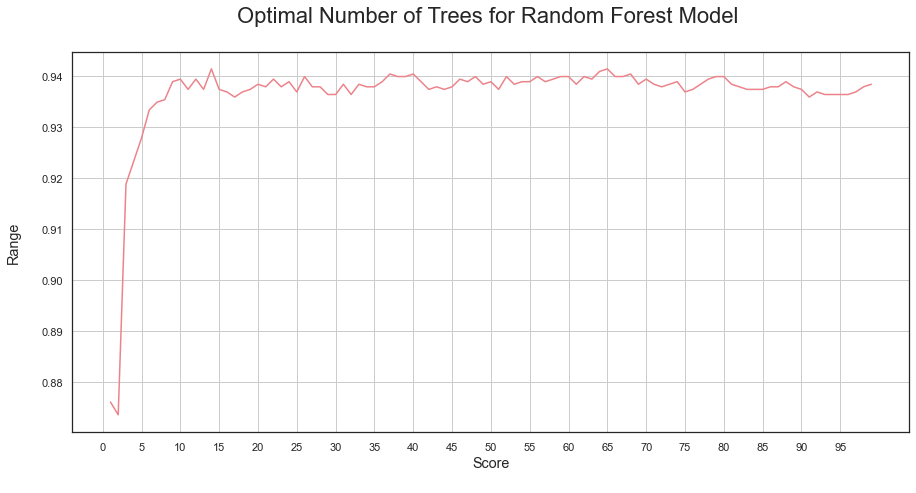

In [122]:
#best number of tree for the Random Forest
score_array = []
for each in range(1,100):
    rf_loop = RandomForestClassifier(n_estimators = each, random_state = 1) 
    rf_loop.fit(x_train,y_train)
    score_array.append(rf_loop.score(x_test,y_test))
 
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,100),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of Trees for Random Forest Model \n',horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.grid(label=True)
plt.xticks((np.arange(0, 100, 5.0) ),rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.show()

In [123]:
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier(n_estimators=65)
clf.fit(x_train,y_train)
y_predRF = clf.predict(x_test)

In [124]:
acc = accuracy_score(y_test, y_predRF)
prec = precision_score(y_test, y_predRF)
rec = recall_score(y_test, y_predRF)
f1 = f1_score(y_test, y_predRF)
f2 = fbeta_score(y_test, y_predRF, beta=2.0)
test_auc = roc_auc_score(y_test, y_predRF)
rf_results = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "F2": f2, "Test ROC-AUC Score: ": test_auc}
rf_results

{'Accuracy': 0.9418254764292878,
 'Precision': 0.9533527696793003,
 'Recall': 0.9784560143626571,
 'F1': 0.9657412876550502,
 'F2': 0.9733301583521847,
 'Test ROC-AUC Score: ': 0.8653889978934028}

K Nearest Neighbors: it is an algorithm used for the identification of patterns for the classification of objects. It is based on features of objects that are near the one considered. For this algorithm, we operated as we did for the previous one, looking for the best number of neighbors (analogously to what we did for Random Forest). number of estimators = each; the ratio was to build a score graph and to see what was the corresponding point to the best score.

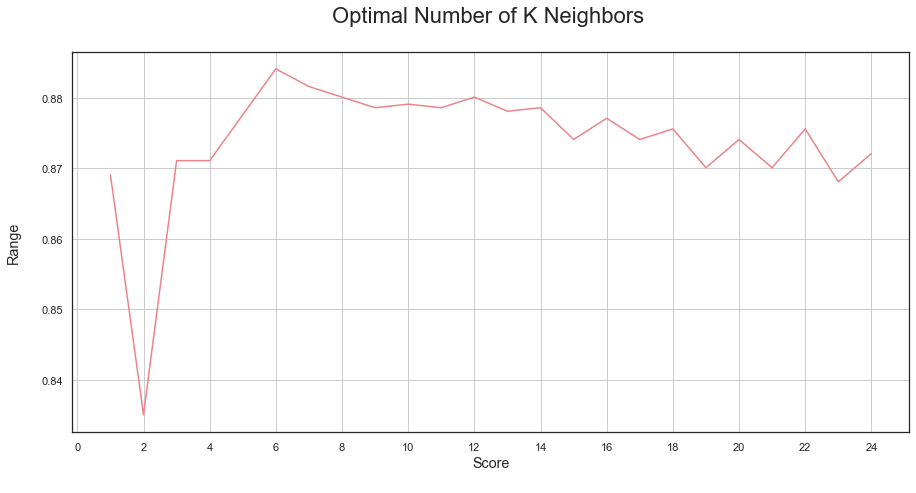

In [125]:
#best number of neighbors for the KNN
score_array = []
for each in range(1,25):
    knn_loop = KNeighborsClassifier(n_neighbors = each) 
    knn_loop.fit(x_train,y_train)
    score_array.append(knn_loop.score(x_test,y_test))
fig = plt.figure(figsize=(15, 7))
plt.plot(range(1,25),score_array, color = '#ec838a')
plt.ylabel('Range\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.xlabel('Score\n',horizontalalignment="center",
fontstyle = "normal", fontsize = "large", 
fontfamily = "sans-serif")
plt.title('Optimal Number of K Neighbors \n',
horizontalalignment="center", fontstyle = "normal", fontsize = "22", fontfamily = "sans-serif")
plt.xticks((np.arange(0, 26, 2.0)), rotation=0, horizontalalignment="center")
plt.yticks(rotation=0, horizontalalignment="right")
plt.grid(label=True)
plt.show()

In [126]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=6)
knn.fit(x_train, y_train)
y_predKNN = knn.predict(x_test)

In [127]:
acc = accuracy_score(y_test, y_predKNN)
prec = precision_score(y_test, y_predKNN)
rec = recall_score(y_test, y_predKNN)
f1 = f1_score(y_test, y_predKNN)
f2 = fbeta_score(y_test, y_predKNN, beta=2.0)
test_auc = roc_auc_score(y_test, y_predKNN)
knn_results = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "F2": f2, "Test ROC-AUC Score: ": test_auc}
knn_results

{'Accuracy': 0.8841524573721163,
 'Precision': 0.9086265607264472,
 'Recall': 0.9581089168162776,
 'F1': 0.9327119137780367,
 'F2': 0.9477859341700213,
 'Test ROC-AUC Score: ': 0.7298284522161884}

Support Vector Machine: it builds an hyperplane or a set of hyperplanes, in a multidimensional, or infinite-dimensional, space. The latter can be used for the classification.

In [128]:
#Support Vector Machine
from sklearn import svm
clf1 = svm.SVC(kernel='linear') 
clf1.fit(x_train, y_train)
y_predSVM = clf1.predict(x_test)

In [129]:
acc = accuracy_score(y_test, y_predSVM)
prec = precision_score(y_test, y_predSVM )
rec = recall_score(y_test, y_predSVM)
f1 = f1_score(y_test, y_predSVM )
f2 = fbeta_score(y_test, y_predSVM, beta=2.0)
test_auc = roc_auc_score(y_test, y_predSVM)
svm_results = {"Accuracy": acc, "Precision": prec, "Recall": rec, "F1": f1, "F2": f2, "Test ROC-AUC Score: ": test_auc}
svm_results

{'Accuracy': 0.8821464393179539,
 'Precision': 0.8997772828507795,
 'Recall': 0.9670855774985039,
 'F1': 0.932218055956158,
 'F2': 0.9528301886792453,
 'Test ROC-AUC Score: ': 0.7049050178514191}

In [130]:
#creating a dataset with all the results that we have obtained
index=["Logistic regression", "Random forest", "Knn", "Support Vector Machine"]
data=[log_results, rf_results, knn_results, svm_results]
gen_accuracy=pd.DataFrame(data, index)

In [131]:
gen_accuracy

,Accuracy,Precision,Recall,F1,F2,Test ROC-AUC Score:
Logistic regression,0.874624,0.901186,0.955117,0.927368,0.943820,0.706661
Random forest,0.941825,0.953353,0.978456,0.965741,0.973330,0.865389
Knn,0.884152,0.908627,0.958109,0.932712,0.947786,0.729828
Support Vector Machine,0.882146,0.899777,0.967086,0.932218,0.952830,0.704905


As for now, we can assume that the model that can be considered as the most reliable one is Random Forest indeed. 

## MODEL EVALUATION

For the Model Evaluation, we decided to proceed with a cross validation and a confusion matrix. Thanks to the first one, we were able to delete the overfitting issue, occuring in the training set; the second one enabled us to analyze the error made by our model. 

In [133]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
#cross validation
accuracies = cross_val_score(estimator = clf, X = x_train, y = y_train, cv = 10)
print("Random Forest Classifier Accuracy: %0.2f (+/- %0.2f)"  % (accuracies.mean(), accuracies.std() * 2))

Random Forest Classifier Accuracy: 0.95 (+/- 0.01)


As we can see, the cross validation score is 95% with a fluctuation of 0.02%.

Text(0.5, 12.453125, 'Predicted label\n')

<Figure size 2880x2880 with 0 Axes>

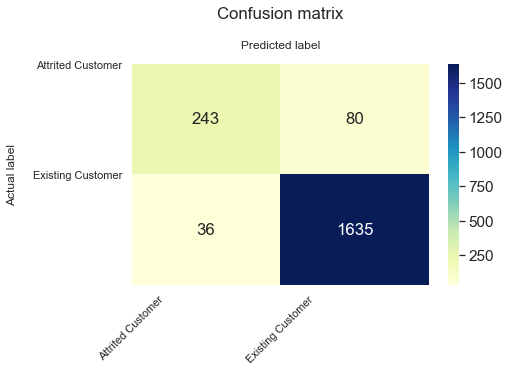

In [134]:
#probabilità del 98% (2485/2532), lo vediamo sotto nella confusion matrix, altro metodo di model evaluation
cm = confusion_matrix(y_test, y_predRF) 
df_cm = pd.DataFrame(cm, index = ('Attrited Customer', 'Existing Customer'), columns = ('Attrited Customer', 'Existing Customer'))
plt.figure(figsize = (40,40))
fig, ax = plt.subplots()
sn.set(font_scale=1.4)
sn.heatmap(df_cm, annot=True, fmt='g',cmap="YlGnBu")
class_names=['Attrited Customer', 'Existing Customer']
tick_marks = np.arange(len(class_names))
plt.tight_layout()
plt.title('Confusion matrix\n', y=1.1)
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names, rotation=0)
ax.xaxis.set_label_position("top")
plt.ylabel('Actual label\n')
plt.xlabel('Predicted label\n')

The Confusion Matrix score is about 94%, in line with the other score of the cross validation that we already have obtained

## RESULTS AND CONCLUSIONS

In [135]:
dfcompare=pd.DataFrame(data=y_test)
dfcompare['predicted value']=y_predRF
dfcompare=dfcompare.sort_index()
index=dfcompare.index
clientid=dataset.loc[index]['CLIENTNUM']
dfcompare['id client']=clientid
dfcompare.rename(columns={'Attrition_Flag':'original value'}, inplace = True)
dfcompare=dfcompare[['id client','original value', 'predicted value']]
dfcompare=dfcompare.replace([0,1], ["Attrited Customer","Existing Customer"])
dfcompare

,id client,original value,predicted value
1,768805383,Existing Customer,Existing Customer
15,712396908,Existing Customer,Existing Customer
23,784725333,Existing Customer,Attrited Customer
30,806624208,Existing Customer,Existing Customer
33,709029408,Existing Customer,Existing Customer
...,...,...,...
10106,709646433,Attrited Customer,Attrited Customer
10114,713733633,Attrited Customer,Existing Customer
10115,720841533,Existing Customer,Existing Customer
10125,716506083,Attrited Customer,Attrited Customer


In [136]:
#grafico a torta e a barre
a=value_counter(dfcompare, ['original value', 'predicted value'])
a['original value']

Existing Customer    1671
Attrited Customer     323
Name: original value, dtype: int64

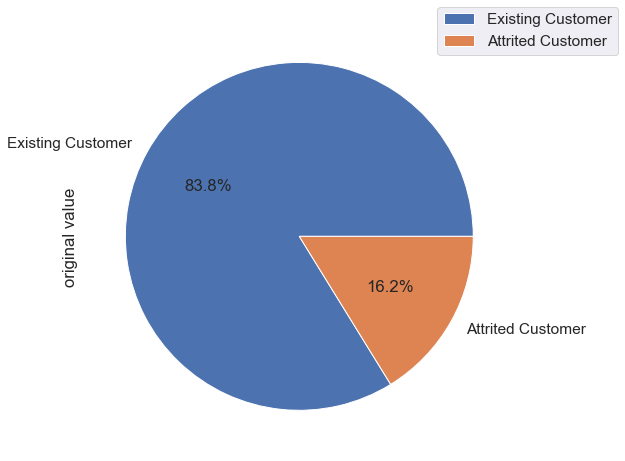

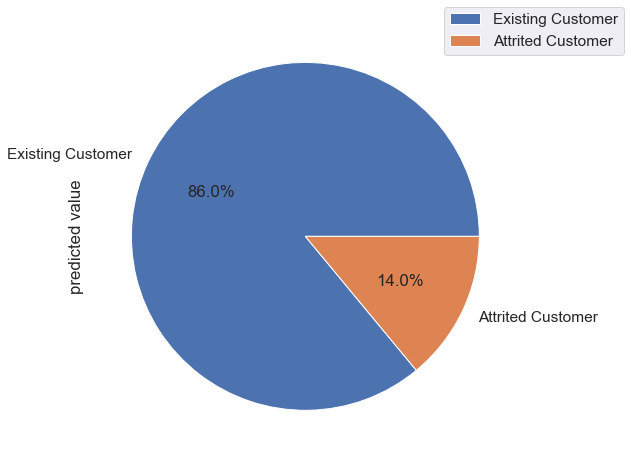

In [137]:
df_pie = pd.DataFrame(data=a['original value'])
df_pie.plot.pie(y='original value', autopct="%.1f%%", figsize=(8, 8))
plt.legend(bbox_to_anchor=(0.8,0.9))
df_pie1 = pd.DataFrame(data=a['predicted value'])
df_pie1.plot.pie(y='predicted value', autopct="%.1f%%", figsize=(8, 8))
plt.legend(bbox_to_anchor=(0.8,0.9))

We note that there is approximately a 3% discrepancy between the actual data and the test set data, obtained by implementing the Random forest. However only a small percentage of the dataset is detected as being at risk of churn

## Future implementations

To completely analyze what we’ve done until now we need to keep attenction on the cons of our model implementation.  In fact, Random forests are not easily interpretable. They provide feature importance but it does not provide complete visibility into the coefficients. Random Forests can be also computationally intensive for large datasets. You can consider random forest like a black box algorithm, you have very little control over what the model does. We can surely affirm that the implementation of our model in the existing process should be easy and with new data flowing into the database, we’ll be able to have new more accurate predictions. Perhaps, as time goes by, the algorithm may find it more difficult to operate with large amounts of data, so we recommend for future implementations a continuous monitoring of the whole process, to see if and how it changes over time, and also a continuous study of the independent variables (both at the level of values, and at the level of total influence on the analysis), trying to exclude any type of bias, which could mislead the model.